## Imports

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

## Dataframe Loading and Song Selection

In [4]:
# Load the dataframe
df = pd.read_csv('data (3).csv')

In [5]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
# Enter a song title
song_title = input("Enter a song title to find similar songs: ")

# Normalize the input for case and remove leading or trailing whitespace
target_song_title = song_title.lower().strip()

# Check if the target_song_title is in the dataset
while target_song_title not in df['name'].str.lower().str.strip().values:
    print("- - - - - ")
    print(f"Error: Song '{target_song_title}' not found in the dataset.")
    target_song_title = input("Enter a song title to find similar songs: ")
    target_song_title = target_song_title.lower().strip()

Enter a song title to find similar songs: that's what i like


In [7]:
# Retrieve all artists for a particular song title and sort alphabetically
available_artists = df.loc[df['name'].str.lower().str.strip() == target_song_title, 'artists'].unique()
available_artists.sort(axis=0)
print("Available artists:")
for i, artist in enumerate(available_artists):
    print(f"{i}. {artist}")

# Prompt user for artist input
artist_choice = input("Select the artist (enter the corresponding number): ")

# Error handling
try:
    artist_choice = int(artist_choice)
except:
    pass

while type(artist_choice) != int or artist_choice < 0 or artist_choice >= len(available_artists):
    print("- - - - - ")
    print("Invalid choice. Please select a valid artist.")
    
    for i, artist in enumerate(available_artists):
        print(f"{i}. {artist}")
    
    artist_choice = input("Select the artist (enter the corresponding number): ")
    
    try:
        artist_choice = int(artist_choice)
    except:
        pass

# Assign artist choice to variable
target_artist = available_artists[artist_choice]

Available artists:
0. ['Bruno Mars']
1. ['Dean Martin']
2. ['The Bellecats', 'Larry Clinton']
Select the artist (enter the corresponding number): 0


In [8]:
# # Retrieve all years for an artists for a particular song title and sort alphabetically
available_years = df.loc[(df['name'].str.lower().str.strip() == target_song_title) & (df['artists'] == target_artist), 'year'].unique()
available_years.sort(axis=0)

print(f"Available song years for {target_artist}:")
for i, year in enumerate(available_years):
    print(f"{i}. {year}")

# Prompt user for song year
year_choice = input("Select the song year (enter the corresponding number): ")

# Error handling
try:
    year_choice = int(year_choice)
except:
    pass

while type(year_choice) != int or year_choice < 0 or year_choice >= len(available_years):
    print("- - - - - ")
    print(f"Invalid choice. Please select a valid song year for {target_artist}.")
    for i, year in enumerate(available_years):
        print(f"{i}. {year}")
    year_choice = input("Select the song year (enter the corresponding number): ")

    try:
        year_choice = int(year_choice)
    except:
        pass

# Assign year choice to variable
target_year = available_years[year_choice]

Available song years for ['Bruno Mars']:
0. 2016
Select the song year (enter the corresponding number): 0


In [9]:
# Retrieve the target song based on name, artist, and year
target_song = df[(df['name'].str.lower().str.strip() == target_song_title) & (df['artists'] == target_artist) & (df['year'] == target_year)]

In [10]:
target_song

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
18823,0.86,2016,0.013,['Bruno Mars'],0.853,206693,0.56,0,0KKkJNfGyhkQ5aFogxQAPU,0.0,1,0.0944,-4.961,1,That's What I Like,81,2016-11-17,0.0406,134.066


In [11]:
# Retrieve index for selected song
target_song_index = target_song.index
target_song_index

Int64Index([18823], dtype='int64')

## Preprocessing

In [12]:
# Index dataframe by song names and drop unnecessary columns
df = df.set_index('name')
df = df.drop(columns=['artists', 'id', 'release_date'])

# Preprocess all other features and create scaled dataframe
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

df_scaled.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
name,,,,,,,,,,,,,,,
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",-1.782825,-2.15247,1.276187,-1.467013,4.763146,-1.013988,-0.303955,2.268102,1.365588,2.626719,-1.514237,0.643912,-1.256808,-0.379706,-1.169307
Clancy Lowered the Boom,1.650688,-2.15247,0.611347,1.598779,-0.399747,-0.528270,-0.303955,-0.532771,0.512123,-0.262229,-0.170766,0.643912,-1.210993,1.945481,-1.821180
Gati Bali,-1.858821,-2.15247,1.220340,-1.188820,2.133824,-1.182122,-0.303955,2.379754,-0.625830,-0.599749,-0.593551,0.643912,-1.210993,-0.396297,-0.212404
Danny Boy,-1.381564,-2.15247,1.236296,-1.489722,-0.166101,-0.647832,-0.303955,-0.532682,-0.056853,1.002043,0.377680,0.643912,-1.302624,-0.387080,-0.545537
When Irish Eyes Are Smiling,-1.047180,-2.15247,1.209703,-0.677855,-0.509485,-1.081242,-0.303955,-0.532765,-0.625830,0.132499,0.240788,0.643912,-1.348440,-0.371104,-0.494867


In [13]:
# Retrieve specific song features via index
target_song = df_scaled.iloc[target_song_index]
target_song

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
name,,,,,,,,,,,,,,,
That's What I Like,1.259307,1.512968,-1.300731,1.79181,-0.192322,0.289978,-0.303955,-0.532771,-1.194806,-0.637506,1.141993,0.643912,2.271005,-0.355127,0.56025


## Calculate Euclidean Distances

In [14]:
# Calculate euclidean distances between the target song and all other songs
distances = euclidean_distances(target_song, df_scaled)

In [15]:
distances

array([[10.6656501 ,  6.77204264,  8.39757225, ...,  3.50184816,
         6.18418634,  4.37785032]])

In [16]:
len(distances)

1

In [17]:
# Insert calculated distances from target song into original dataframe at column position 0
df_distance_col = distances[0]
df.insert(0, 'distance', df_distance_col)
df

,distance,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
name,,,,,,,,,,,,,,,,
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",10.665650,0.0594,1921,0.98200,0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954
Clancy Lowered the Boom,6.772043,0.9630,1921,0.73200,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936
Gati Bali,8.397572,0.0394,1921,0.96100,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339
Danny Boy,7.553583,0.1650,1921,0.96700,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109
When Irish Eyes Are Smiling,7.005741,0.2530,1921,0.95700,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,2.581578,0.6080,2020,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029
Halloweenie III: Seven Days,2.272716,0.7340,2020,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936
AYA,3.501848,0.6370,2020,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688


## Sort Dataframe by Distance to Selected Song

In [18]:
# Sort the dataframe by distance
df_sorted = df.sort_values(by='distance')

df_sorted.head()

,distance,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
name,,,,,,,,,,,,,,,,
That's What I Like,0.000000,0.860,2016,0.01300,0.853,206693,0.560,0,0.000000,1,0.0944,-4.961,1,81,0.0406,134.066
S&M,0.894966,0.835,2010,0.01050,0.769,243600,0.684,0,0.000125,1,0.0887,-5.019,1,72,0.0411,127.972
Ignition - Remix,0.909779,0.855,2003,0.06100,0.795,186067,0.523,0,0.000000,1,0.0914,-7.165,1,70,0.0423,133.024
Your Love Is My Drug,0.983483,0.756,2010,0.00681,0.826,187133,0.612,0,0.000000,1,0.0889,-3.891,1,69,0.0982,120.057
Ignition - Remix,1.009265,0.802,2014,0.05490,0.778,186040,0.549,0,0.000000,1,0.0724,-6.144,1,63,0.0473,133.041


In [19]:
df_sorted.describe()

,distance,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,5.521372,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,1.714467,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,4.263874,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,5.322590,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,6.641244,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,42.047080,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [20]:
# Display the top n most similar songs based on minimal distance to selected song
n = 5
df_sorted.head(n+1)

,distance,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
name,,,,,,,,,,,,,,,,
That's What I Like,0.000000,0.860,2016,0.01300,0.853,206693,0.560,0,0.000000,1,0.0944,-4.961,1,81,0.0406,134.066
S&M,0.894966,0.835,2010,0.01050,0.769,243600,0.684,0,0.000125,1,0.0887,-5.019,1,72,0.0411,127.972
Ignition - Remix,0.909779,0.855,2003,0.06100,0.795,186067,0.523,0,0.000000,1,0.0914,-7.165,1,70,0.0423,133.024
Your Love Is My Drug,0.983483,0.756,2010,0.00681,0.826,187133,0.612,0,0.000000,1,0.0889,-3.891,1,69,0.0982,120.057
Ignition - Remix,1.009265,0.802,2014,0.05490,0.778,186040,0.549,0,0.000000,1,0.0724,-6.144,1,63,0.0473,133.041
Your Song,1.056597,0.962,2017,0.15800,0.855,180757,0.624,0,0.000000,1,0.0513,-4.093,1,68,0.0488,117.959


In [21]:
recommended_songs = df_sorted.head(n+1)  # Extract the top n+1 songs (including the target song)
attributes = ['distance', 'valence','acousticness','danceability','duration_ms','energy','explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness','tempo']
recommended_attributes = recommended_songs[attributes]  #Took out the year released


In [22]:
scaler = StandardScaler()
recommended_attributes_scaled = pd.DataFrame(scaler.fit_transform(recommended_attributes), columns=attributes)


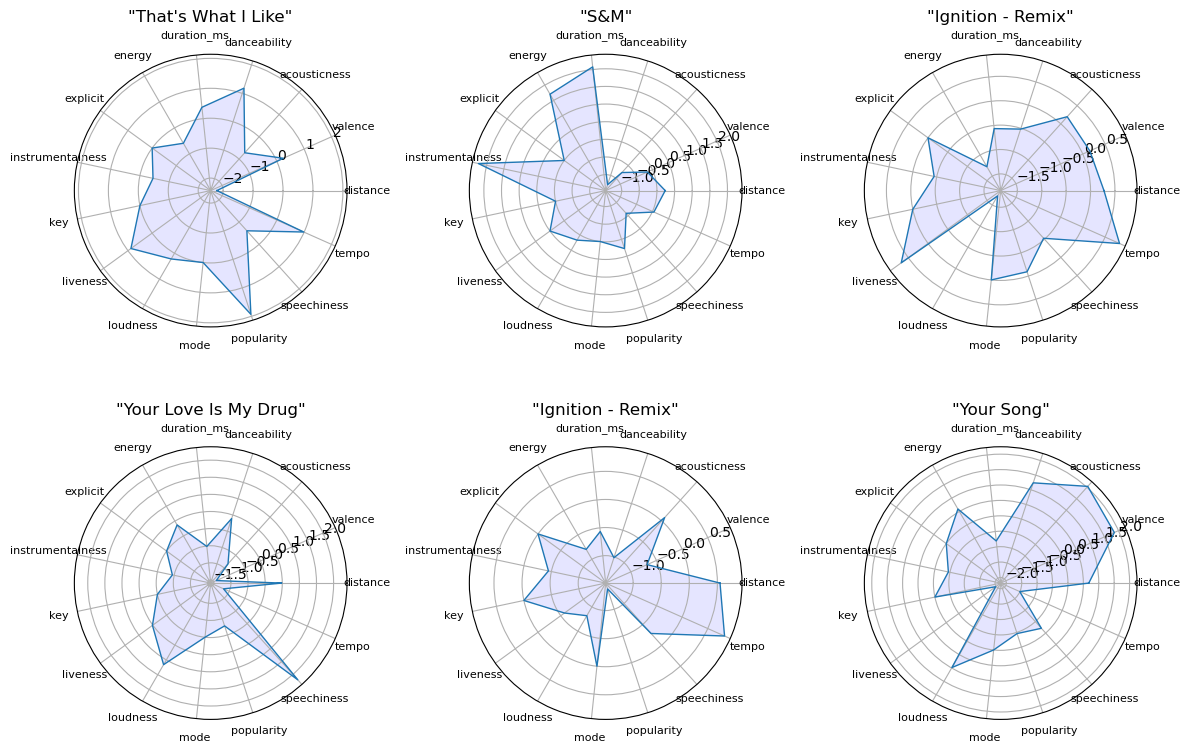

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of songs and attributes
num_songs = len(recommended_songs)
num_attributes = len(attributes)

# Calculate the number of rows and columns for the subplot grid
rows = 2
columns = int(np.ceil(num_songs / rows))

fig, axes = plt.subplots(rows, columns, figsize=(12, 8), subplot_kw={'projection': 'polar'})

# Retrieve track_name
track_name = recommended_songs.index.values.tolist()

# Loop for different chart per song recommended 
for i, (song_label, attribute_values) in enumerate(zip(track_name, recommended_attributes_scaled.values)):
    # Calculate the row and column index for the current subplot
    row_idx = i // columns
    col_idx = i % columns

    # Get the corresponding axis for the current subplot
    if num_songs > 1:
        ax = axes[row_idx, col_idx]
    else:
        ax = axes

    # Compute angle for each attribute
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()

    # Close the plot by repeating the first angle
    angles += angles[:1]

    # Close the attribute values by repeating the first value
    attribute_values = np.concatenate((attribute_values, [attribute_values[0]]))

    # Plot the song's attribute values as a line
    ax.plot(angles, attribute_values, linewidth=1, linestyle='solid', label=song_label)

    # Fill the area under the line with a color
    ax.fill(angles, attribute_values, 'b', alpha=0.1)

    # Set the labels for each attribute and rotate them for better readability
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=8)

    #title
    ax.set_title(f'"{song_label}"')
   
    
#make it more spacious
fig.tight_layout()

plt.show()


Play Song off Spotify Browser

In [ ]:
import json
import spotipy
import webbrowser

## Get user information if they have spotify prenium 

clientID = '2cd83c60b7b64cf1914230c359246eae'
clientSecret = '58baa334e5e34e719da4cbd04c57951b'
#youtube sounds like a cool option
redirect_uri = 'youtube.com'

In [ ]:
# Create OAuth Object
o_object= spotipy.SpotifyOAuth(clientID,clientSecret, redirect_uri)
# Create token
token1 = o_object.get_access_token()
token = token1['access_token']
# Create Spotify Object
s_Object = spotipy.Spotify(auth=token)

In [ ]:
user = s_Object.current_user()

In [ ]:
# Get the track name and artist from the user
track_name = input("Enter Track Name: ")
artist_name = input("Enter Artist Name: ")

# Search for the track and artist
search_query = f"track:{track_name} artist:{artist_name}"
results = s_Object.search(search_query, 1, 0, "track")

# Get required data from JSON response
tracks1 = results['tracks']
if len(tracks1['items']) > 0:
    song_url = tracks1['items'][0]['external_urls']['spotify']
    # Open the song in a web browser
    webbrowser.open(song_url)
else:
    print("No matching tracks found.")